<a href="https://colab.research.google.com/github/MartaCampagnoli/HateSpeechDetection/blob/main/Output%20Notebooks/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import re
import string

In [ ]:
def clean_text(text): #standard text cleaning function with no stopwords removal
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.encode('ascii', 'ignore').decode('ascii')
    text = text.lower()
    return text

def encode_df(dataframe): #label encoder for six categories dataset
    le = LabelEncoder()
    for column in dataframe.columns:
        dataframe['target'] = le.fit_transform(dataframe['target'])
    return dataframe

In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Dynamically Generated Hate Dataset.csv'])) #Dynamically Generated Hate Dataset.csv

In [ ]:
df

,Unnamed: 0,acl.id,X1,text,label,type,target,level,split,round.base,annotator,round,acl.id.matched
0,1,acl1,1,dalits are lowlives,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
1,2,acl10,2,gay people are a burden to our society,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
2,3,acl100,3,Arabs are not welcome,hate,notgiven,notgiven,original,train,1,vDe7GN0NrL,1,NaN
3,4,acl1000,4,I'm not saying we should actually eliminate he...,hate,notgiven,notgiven,original,train,1,oemYWm1Tjg,1,NaN
4,5,acl10000,5,bananas are for black people,hate,notgiven,notgiven,original,test,1,QiOKkCi7F8,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41139,117100,acl9974,41228,Indian culture is so backwards,hate,notgiven,notgiven,original,test,1,GNZuCtwed3,1,NaN
41140,118100,acl11574,1752,"Women don't want equality, they just want to b...",hate,derogation,wom,original,train,2,CAgNlUizNm,2a,acl11575
41141,119100,acl13446,3832,fuck covid,nothate,none,none,original,train,2,CAgNlUizNm,2a,acl13447
41142,1205,acl13457,3844,This computer is garbage,nothate,none,none,original,train,2,eLGzdD8Tvb,2a,acl13458


<AxesSubplot:xlabel='label', ylabel='count'>

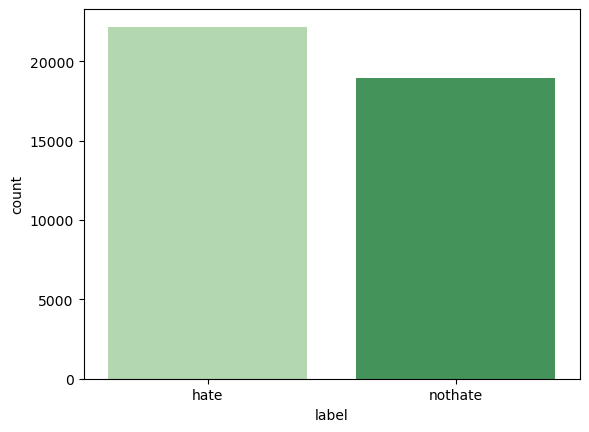

In [ ]:
sns.countplot(x = 'label',data= df, palette = 'Greens')

## New Dataset: Hate or Not?

In [ ]:
dfnew = df[['text', 'label', 'level', 'target']]
dfnew['text'] = dfnew['text'].astype(str).apply(clean_text)

In [ ]:
dfnew["label"].value_counts()

hate       22175
nothate    18969
Name: label, dtype: int64

In [ ]:
dfnew.to_csv('cleandata.csv',index =False)

## New Dataset: Which kind of Hate?

In [ ]:
dfnew["target"].value_counts().head(11)

none        18969
notgiven     7110
wom          2035
bla          1961
jew          1096
mus          1002
trans         792
gay           724
immig         672
dis           489
ref           470
Name: target, dtype: int64

In [ ]:
options = ['wom', 'bla', 'jew', 'mus', 'trans', 'gay']

# selecting rows based on condition
sixcat = dfnew[dfnew['target'].isin(options)]

In [ ]:
sixcat= sixcat.reset_index(drop=True)

In [ ]:
encode_df(sixcat)

,text,label,level,target
0,can you smell these dirty muzzies it s a bruta...,1,original,3
1,black people are all dirty stinky and lazy you...,1,perturbation,0
2,trans are sycophantic,1,original,4
3,yeah life is cunty but fucking hell get over i...,1,perturbation,5
4,there are absolutely loads of filthy muslims o...,1,perturbation,3
...,...,...,...,...
7605,italy looks nice but i m not sure its worth go...,1,perturbation,0
7606,men aren t damaged just a lot of pussies men b...,1,original,5
7607,in my opinion that s pretty much how it goes f...,1,perturbation,2
7608,women don t want equality they just want to be...,1,original,5


In [ ]:
sixcat['target'].value_counts()

5    2035
0    1961
2    1096
3    1002
4     792
1     724
Name: target, dtype: int64

In [ ]:
sixcat.to_csv('sixcat.csv',index =False)